# U.S. Treasury FiscalData API in Python

by Avery Fernandez and Michael T. Moen

Please see the following resources for more information on API usage:

- Documentation
    - <a href="https://fiscaldata.treasury.gov/api-documentation" target="_blank">FiscalData API Documentation</a>
    - <a href="https://fiscaldata.treasury.gov/datasets/" target="_blank">FiscalData Dataset Search</a>
- Terms
    - <a href="https://fiscaldata.treasury.gov/about-us/" target="_blank">About Fiscal Data</a>
- Data Reuse
    - <a href="https://fiscaldata.treasury.gov/api-documentation/#license-and-authorization" target="_blank">U.S. Treasury Data Reuse</a>

*These recipe examples were tested on April 18, 2025.*

## Setup

The following external libraries need to be installed into your enviornment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/psf/requests" target="_blank">requests</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>

We import the libraries used in this tutorial below:

In [1]:
import requests
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 1. Treasury Reporting Rates of Exchange

This first example will use the `/rates_of_exchange/` endpoint. First, let's assemble our url for API request. This request is made up of three parts:

1. Base URL: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is `/rates_of_exchange/`.

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the country, currency, and exchange rate.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on Dec. 31, 2024. We can set the page size to 1000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found <a href="https://fiscaldata.treasury.gov/api-documentation/#parameters" target="_blank">here</a>. Information on the parameters for this specific endpoint can be found <a href="https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange" target="_blank">here</a>.

In [2]:
BASE_URL = "https://api.fiscaldata.treasury.gov/services/api/fiscal_service/"
endpoint = "v1/accounting/od/rates_of_exchange"

# Parameters for date, country, currency, currency description, and exchange rate
params = {
    "fields": "country,currency,exchange_rate",
    "filter": "record_date:eq:2024-12-31",
    "page[size]": 1000
}
response = requests.get(BASE_URL + endpoint, params=params)
data = response.json()["data"]

# Print number of results returned
len(data)

198

In [3]:
# Display first 3 results
data[:3]

[{'country': 'Afghanistan', 'currency': 'Afghani', 'exchange_rate': '70.35'},
 {'country': 'Albania', 'currency': 'Lek', 'exchange_rate': '93.85'},
 {'country': 'Algeria', 'currency': 'Dinar', 'exchange_rate': '135.103'}]

In [4]:
# Reformat the data to be a list of (country, currency, exchange_rate) tuples
exchange_rate_data = [(entry["country"],
                       entry["currency"],
                       float(entry["exchange_rate"]))
                      for entry in data]

# Display first 20 results
exchange_rate_data[:20]

[('Afghanistan', 'Afghani', 70.35),
 ('Albania', 'Lek', 93.85),
 ('Algeria', 'Dinar', 135.103),
 ('Angola', 'Kwanza', 912.0),
 ('Antigua & Barbuda', 'East Caribbean Dollar', 2.7),
 ('Argentina', 'Peso', 1052.5),
 ('Armenia', 'Dram', 390.0),
 ('Australia', 'Dollar', 1.612),
 ('Austria', 'Euro', 0.961),
 ('Azerbaijan', 'Manat', 1.7),
 ('Bahamas', 'Dollar', 1.0),
 ('Bahrain', 'Dinar', 0.377),
 ('Bangladesh', 'Taka', 119.0),
 ('Barbados', 'Dollar', 2.02),
 ('Belarus', 'New Ruble', 3.443),
 ('Belgium', 'Euro', 0.961),
 ('Belize', 'Dollar', 2.0),
 ('Benin', 'Cfa Franc', 626.0),
 ('Bermuda', 'Dollar', 1.0),
 ('Bolivia', 'Boliviano', 6.86)]

### Graphing Exchange Rates By Country

To create a useful graph of our data, we will need to remove outliers from dataset, since the extremely high exchange rates of some currencies will otherwise throw off the graph's scale. In our example, we only consider the exchange rates of currencies whose exchange rate is less than 5.

In [5]:
# Max exchange rate of data to be graphed
max_exchange_rate = 5

# Remove all currencies with an exchange rate greater than the max_exchange_rate
exchange_rate_data = [entry for entry in exchange_rate_data if entry[2] < max_exchange_rate]

# Reverse data so that it appears in alphabetical order
exchange_rate_data.reverse()

# Split the data into three separate lists to be used with matplotlib
countries, currencies, exchange_rates = zip(*exchange_rate_data)

Now that we've prepared our data, we can use matplotlib to graph it:

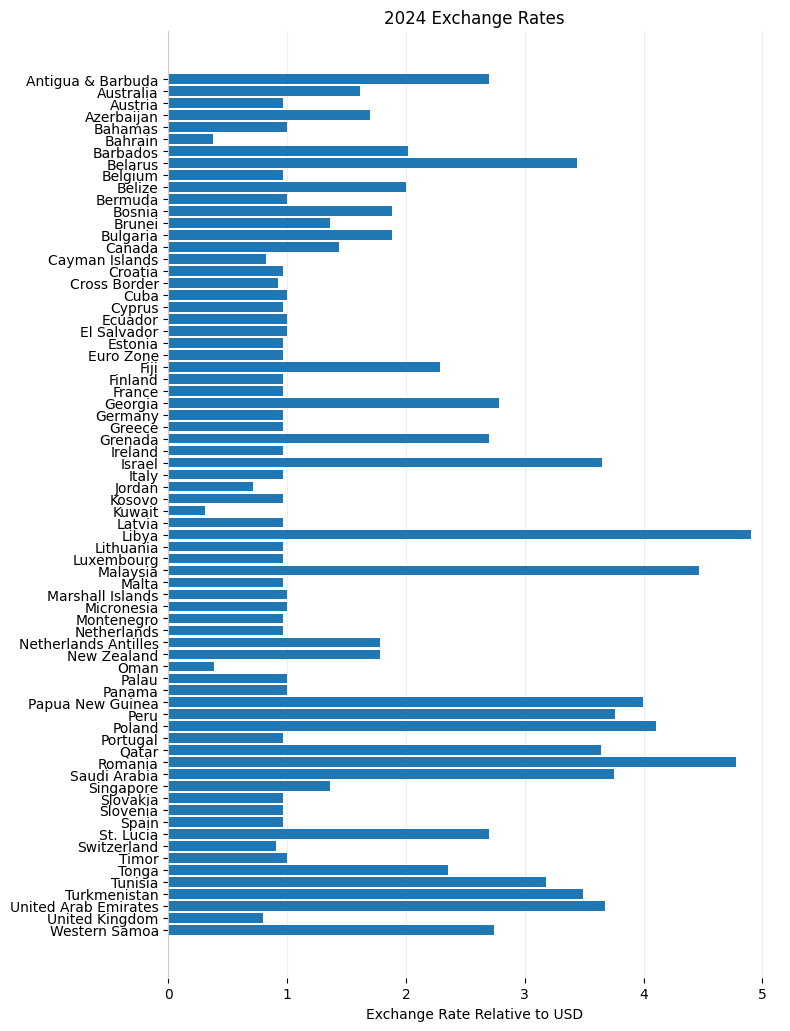

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 10))
ax1.barh(countries, exchange_rates)
ax1.tick_params(axis='y')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#CCCCCC')
ax1.spines['bottom'].set_visible(False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(False)
ax1.xaxis.grid(True, color='#EEEEEE')

fig.tight_layout()
ax1.set_xlabel("Exchange Rate Relative to USD")
plt.title("2024 Exchange Rates")

plt.show()

## 2. Debt to the Penny

This example will use the `/debt_to_penny/` endpoint. Once again, our API request is made up of 3 parts:

1. Base URL: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is `/debt_to_penny/`.

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the total public debt for each date.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on dates greater than or equal to (gte) Jan. 1, 2015 and less than Jan. 1, 2025. We can also set the page size to 10000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found <a href="https://fiscaldata.treasury.gov/api-documentation/#parameters" target="_blank">here</a>. Information on the parameters for this specific endpoint can be found <a href="https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange" target="_blank">here</a>.

In [7]:
# Debt to penny endpoint
endpoint = "v2/accounting/od/debt_to_penny"

# Parameters for date and total public debt outstanding
params = {
    "fields": "record_date,tot_pub_debt_out_amt",
    "filter": "record_date:gte:2015-01-01,record_date:lt:2025-01-01",
    "page[size]": 10000
}
data = requests.get(BASE_URL + endpoint, params=params).json()["data"]

# Print length of data
len(data)

2511

In [8]:
# Display first 5 results
data[:5]

[{'record_date': '2015-01-02', 'tot_pub_debt_out_amt': '18080612655244.26'},
 {'record_date': '2015-01-05', 'tot_pub_debt_out_amt': '18091316381602.62'},
 {'record_date': '2015-01-06', 'tot_pub_debt_out_amt': '18097814959110.13'},
 {'record_date': '2015-01-07', 'tot_pub_debt_out_amt': '18098260560760.27'},
 {'record_date': '2015-01-08', 'tot_pub_debt_out_amt': '18084817920825.53'}]

Now, we'll find the total public debt reported in the first recorded date of each month in the dataset:

In [9]:
monthly_debts = []  # Store debt per month in (date, debt) tuples
recent_month = ""   # Track last month recorded so we only record the first value of each month

for data_point in data:
    
    month = data_point["record_date"][5:7]
    year = data_point["record_date"][0:4]
    
    # Check to see if it is a new month
    if recent_month != month:
        recent_month = month     # Update the recentMonth point
        # Format the date to only include the month and year
        date = month + "/" + year
        date = dt.datetime.strptime(date,'%m/%Y').date()
        monthly_debts.append((date, float(data_point["tot_pub_debt_out_amt"])))

# Display first 5 results
monthly_debts[:5]

[(datetime.date(2015, 1, 1), 18080612655244.26),
 (datetime.date(2015, 2, 1), 18099042237253.89),
 (datetime.date(2015, 3, 1), 18153537817364.77),
 (datetime.date(2015, 4, 1), 18152046284380.77),
 (datetime.date(2015, 5, 1), 18152549890270.99)]

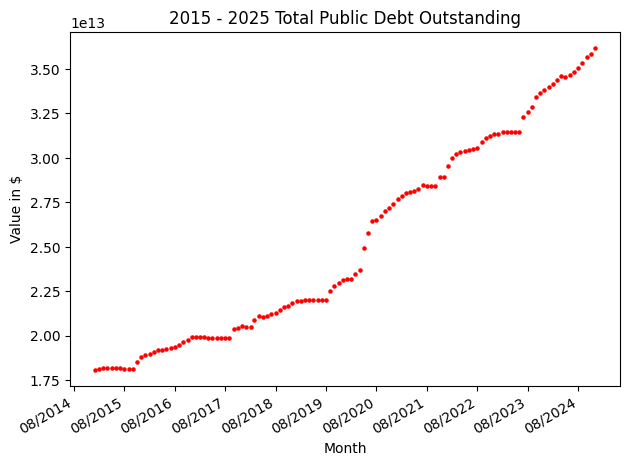

In [10]:
dates, debts = zip(*monthly_debts)

fig, ax1 = plt.subplots()
ax1.set_ylabel("Value in $")
ax1.scatter(dates,debts, s=5, color="red")
ax1.tick_params(axis='y')

fig.tight_layout()
ax1.set_xlabel("Month")
plt.title("2015 - 2025 Total Public Debt Outstanding")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gcf().autofmt_xdate()

plt.show()

## 3. Social Security Administration Data

For the next example, we'll look at the ``/statement_net_cost/`` endpoint:

In [11]:
# Debt to statement net cost endpoint
endpoint = "v2/accounting/od/statement_net_cost"

# Parameters for date and total public debt outstanding
parameters = "?fields=&filter=&page[size]=10000"
params = {
    "fields": "record_date,gross_cost_bil_amt,earned_revenue_bil_amt,agency_nm",
    "filter": "record_date:gte:2015-01-01,record_date:lt:2025-01-01",
    "page[size]": 10000
}
data = requests.get(BASE_URL + endpoint, params=params).json()["data"]

# Print length of data
len(data)

818

In [12]:
# Display first 3 results
data[:3]

[{'record_date': '2015-09-30',
  'gross_cost_bil_amt': '44.4',
  'earned_revenue_bil_amt': '1.6',
  'agency_nm': 'Department of Housing and Urban Development'},
 {'record_date': '2015-09-30',
  'gross_cost_bil_amt': '33.0',
  'earned_revenue_bil_amt': '1.7',
  'agency_nm': 'Department of Justice'},
 {'record_date': '2015-09-30',
  'gross_cost_bil_amt': '30.6',
  'earned_revenue_bil_amt': '3.8',
  'agency_nm': 'Department of State'}]

In [13]:
yearly_costs_and_revenues = [] # Store costs in (date, cost, revenue) tuples
recent_year = ""    # Track last month recorded so we only record the first value of each month

for data_point in data:
    
    year = data_point["record_date"][0:4]
    
    # Check to see if it is a new month
    if (recent_year != year) and (data_point["agency_nm"] == "Social Security Administration"):
        
        month = data_point["record_date"][5:7]
        revenue = float(data_point["earned_revenue_bil_amt"])
        cost = float(data_point["gross_cost_bil_amt"])
        
        recent_year = year
        
        yearly_costs_and_revenues.append((year, cost, revenue))

# Split tuple into three separate lists for matplotlib to graph
dates, costs, revenues = zip(*yearly_costs_and_revenues)

# Display results
yearly_costs_and_revenues

[('2015', 945.0, 0.3),
 ('2016', 982.1, 0.3),
 ('2017', 999.1, 0.3),
 ('2018', 999.1, 0.3),
 ('2019', 1038.5, 0.2),
 ('2020', 1101.2, 0.3),
 ('2021', 1157.6, 0.3),
 ('2022', 1294.4, 0.3),
 ('2023', 1294.3, 0.3),
 ('2024', 1530.5, 0.3)]

In [14]:
# Print revenue and cost as a table:
print("year     earned_revenue_bil_amt    gross_cost_bil_amt")
for item in yearly_costs_and_revenues:
    print ("{:<8} {:<25} {:<20}".format(item[0], item[2], item[1]))

year     earned_revenue_bil_amt    gross_cost_bil_amt
2015     0.3                       945.0               
2016     0.3                       982.1               
2017     0.3                       999.1               
2018     0.3                       999.1               
2019     0.2                       1038.5              
2020     0.3                       1101.2              
2021     0.3                       1157.6              
2022     0.3                       1294.4              
2023     0.3                       1294.3              
2024     0.3                       1530.5              


## 4. Income Tax Refunds Issued

This example will use the `/income_tax_refunds_issued/` endpoint, which is an extension of the `/dts/` (daily treasury statement) endpoint. Once again, our API request is made up of 3 parts:

1. Base URL: The URL for the U.S. Treasury Fiscal Data API. All requests to this API must start withs this URL.

2. Endpoint: The specific dataset that we wish to retrieve from this API. In this example, it is `/income_tax_refunds_issued/`.

3. Parameters: Further specifications that we request from the endpoint. In this case, we are requesting a few fields with a filter on the date:

    - Fields: The specific data points that we are requesting from the endpoint. In this example, we retrieve the tax refund types, descriptions, and amounts rounded to the newarest million for each date.

    - Filters: Limits on the data received from the endpoint. In this example, we limit the data to the data points recorded on dates greater than or equal to (gte) Jan. 1, 2024 and less than Jan. 1, 2025. We also limit the page size to 10000, since the default for this API is to return the first 100 results. This allows us to retrieve the full dataset.

More information on parameters for this API can be found <a href="https://fiscaldata.treasury.gov/api-documentation/#parameters" target="_blank">here</a>. Information on the parameters for this specific endpoint can be found <a href="https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange" target="_blank">here</a>.

In [15]:
# Debt to statement net cost endpoint
endpoint = "/v1/accounting/dts/income_tax_refunds_issued"

# Parameters for date, tax refund type, tax refund type description, and tax refund amount
params = {
    "fields": "record_date,tax_refund_type,tax_refund_type_desc,tax_refund_today_amt",
    "filter": "record_date:gte:2024-01-01,record_date:lt:2025-01-01",
    "page[size]": 10000
}
data = requests.get(BASE_URL + endpoint, params=params).json()["data"]

# Print length of data
len(data)

1004

In [16]:
# Display first 5 results
data[:5]

[{'record_date': '2024-01-02',
  'tax_refund_type': 'Taxes - Business Tax Refunds (Checks)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '1166'},
 {'record_date': '2024-01-02',
  'tax_refund_type': 'Taxes - Business Tax Refunds (EFT)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '51'},
 {'record_date': '2024-01-02',
  'tax_refund_type': 'Taxes - Individual Tax Refunds (Checks)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '492'},
 {'record_date': '2024-01-02',
  'tax_refund_type': 'Taxes - Individual Tax Refunds (EFT)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '72'},
 {'record_date': '2024-01-03',
  'tax_refund_type': 'Taxes - Business Tax Refunds (Checks)',
  'tax_refund_type_desc': 'null',
  'tax_refund_today_amt': '0'}]

In [17]:
# Store values in (date, refund type, refund amount) tuples
tax_refunds_by_type_and_day = []

for data_point in data:
        
    date = data_point["record_date"]
    refund_type = data_point["tax_refund_type"]
    amount = data_point["tax_refund_today_amt"]
    
    tax_refunds_by_type_and_day.append((date, refund_type, amount))

# Display first 20 results
tax_refunds_by_type_and_day[:20]

[('2024-01-02', 'Taxes - Business Tax Refunds (Checks)', '1166'),
 ('2024-01-02', 'Taxes - Business Tax Refunds (EFT)', '51'),
 ('2024-01-02', 'Taxes - Individual Tax Refunds (Checks)', '492'),
 ('2024-01-02', 'Taxes - Individual Tax Refunds (EFT)', '72'),
 ('2024-01-03', 'Taxes - Business Tax Refunds (Checks)', '0'),
 ('2024-01-03', 'Taxes - Business Tax Refunds (EFT)', '0'),
 ('2024-01-03', 'Taxes - Individual Tax Refunds (Checks)', '9'),
 ('2024-01-03', 'Taxes - Individual Tax Refunds (EFT)', '-2'),
 ('2024-01-04', 'Taxes - Business Tax Refunds (Checks)', '5'),
 ('2024-01-04', 'Taxes - Business Tax Refunds (EFT)', '20'),
 ('2024-01-04', 'Taxes - Individual Tax Refunds (Checks)', '168'),
 ('2024-01-04', 'Taxes - Individual Tax Refunds (EFT)', '-2'),
 ('2024-01-05', 'Taxes - Business Tax Refunds (Checks)', '6'),
 ('2024-01-05', 'Taxes - Business Tax Refunds (EFT)', '-6'),
 ('2024-01-05', 'Taxes - Individual Tax Refunds (Checks)', '2'),
 ('2024-01-05', 'Taxes - Individual Tax Refunds (

Finally, let's graph the tax return data using matplotlib. To do this, we must first add up the amounts for each day of the period:

In [18]:
# Store tax refund data in {date: amount} pairings
tax_refunds_by_day = {}

for data_point in tax_refunds_by_type_and_day:
    
    # Convert date into datetime object for matplotlib
    date = dt.datetime.strptime(data_point[0],"%Y-%m-%d").date()
    amount = float(data_point[2])
    
    if date in tax_refunds_by_day:
        tax_refunds_by_day[date] += amount
    else:
        tax_refunds_by_day[date] = amount

dates = list(tax_refunds_by_day.keys())
amounts = list(tax_refunds_by_day.values())

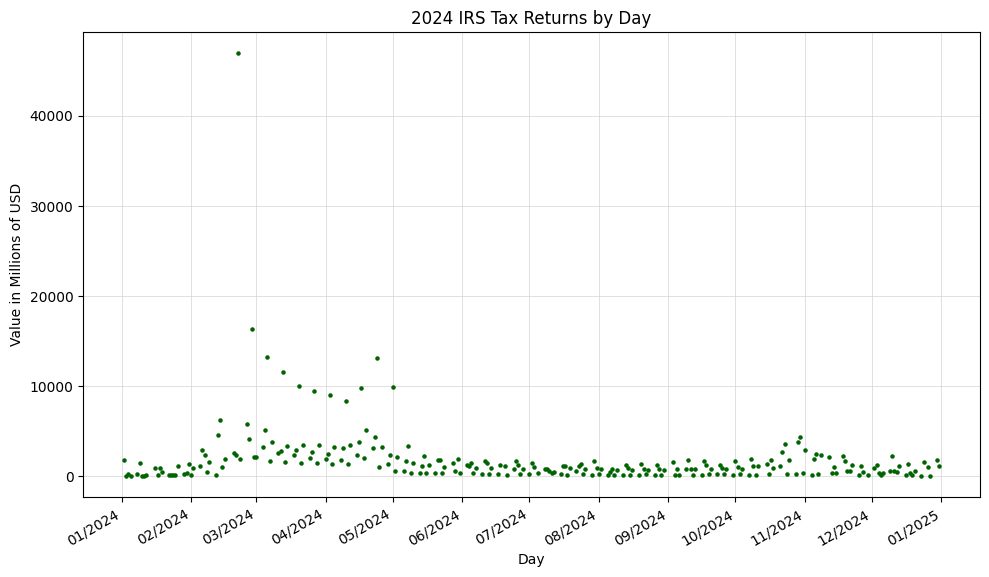

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel("Value in Millions of USD")
ax1.scatter(dates, amounts, s=5, color="darkgreen")
ax1.tick_params(axis='y')

fig.tight_layout()
ax1.set_xlabel("Day")
ax1.grid(linewidth=0.5, color='lightgray')
ax1.set_axisbelow(True)
plt.title("2024 IRS Tax Returns by Day")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()